#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV


#### Load & Explore Data

In [2]:
df = pd.read_csv('data\\data.csv')

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.dropna(axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [7]:
df.shape

(569, 31)

In [8]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

#### Label Encoding

In [9]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [10]:
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

In [11]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Split Dataset & Feature Scaling

In [12]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [13]:
X = (X - X.mean())/X.std()

#### Data Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

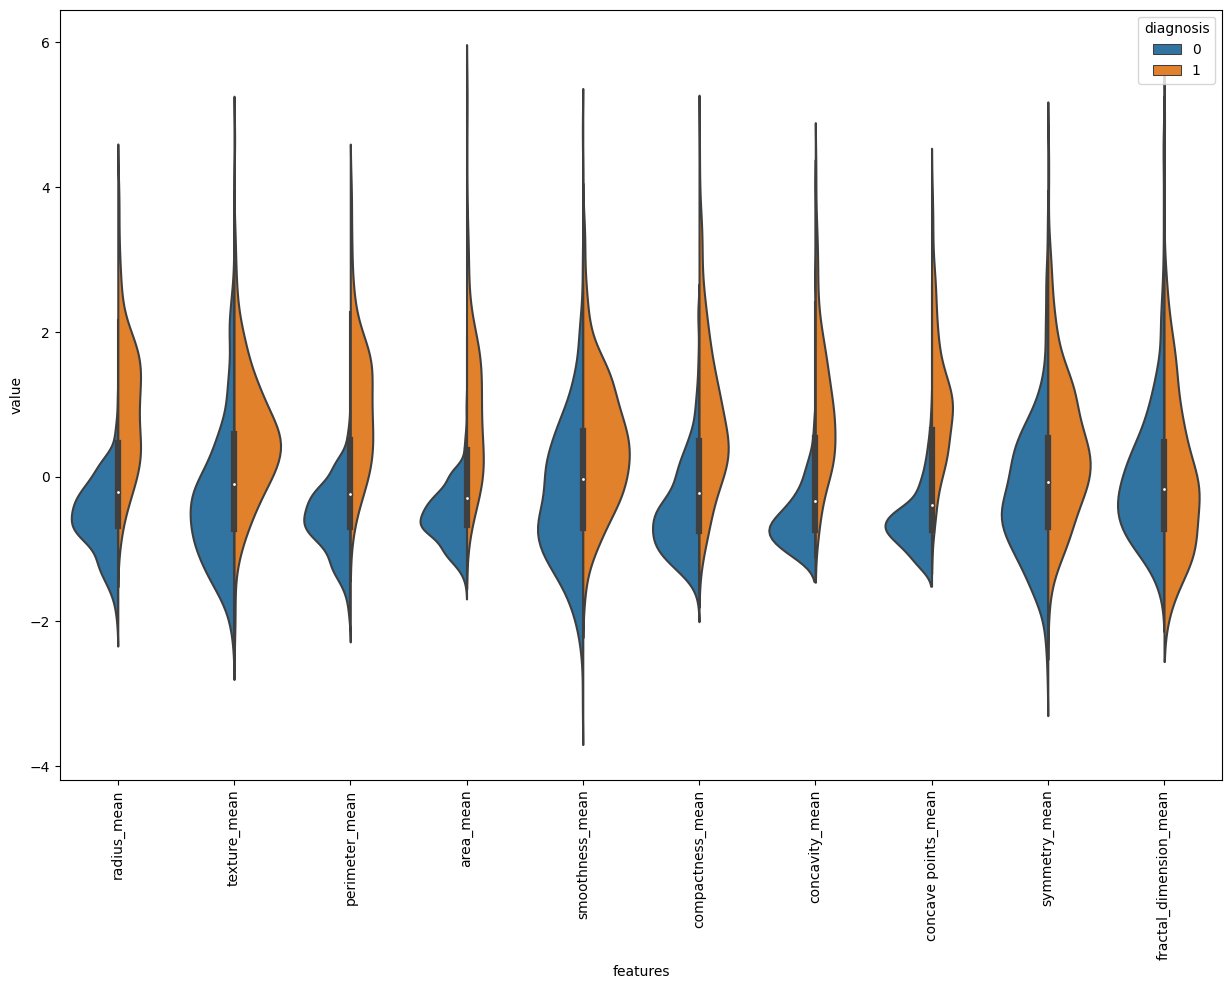

In [14]:
data = pd.concat([y, X.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(data=data, x='features', y='value', hue='diagnosis', split=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

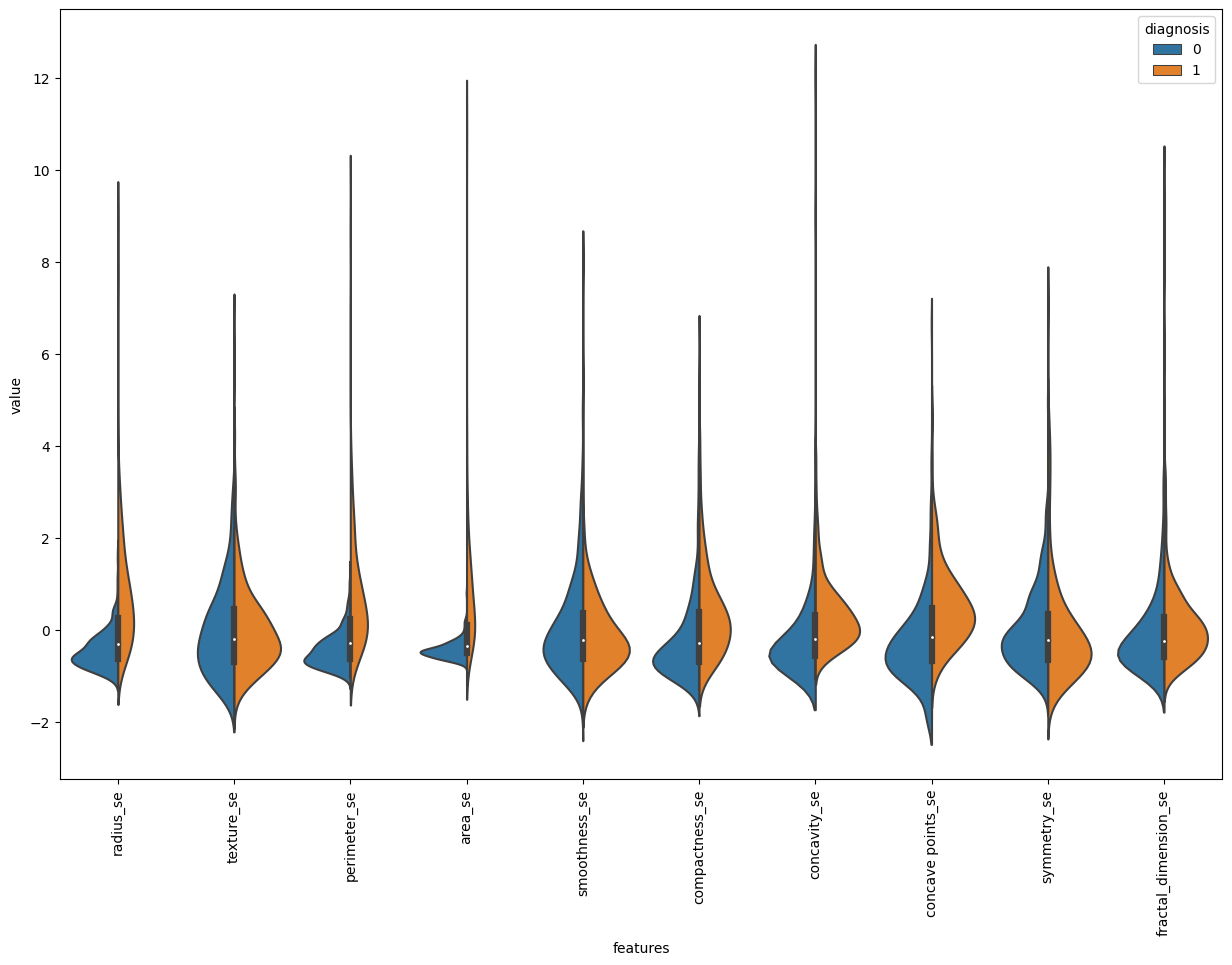

In [15]:
data = pd.concat([y, X.iloc[:,10:20]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(data=data, x='features', y='value', hue='diagnosis', split=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

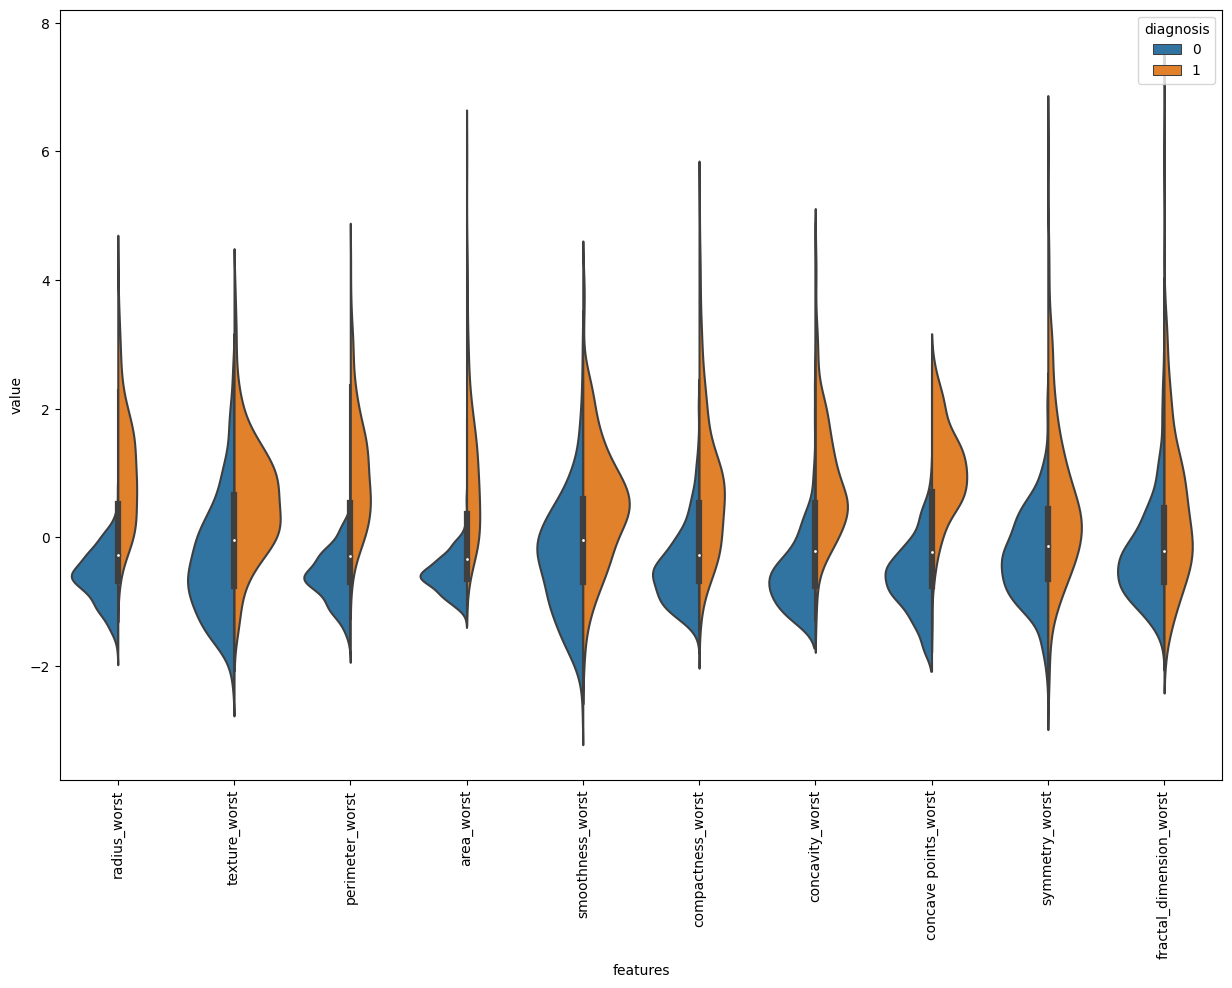

In [16]:
data = pd.concat([y, X.iloc[:,20:30]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(data=data, x='features', y='value', hue='diagnosis', split=True)
plt.xticks(rotation=90)

Plot the correlation matrix

<Axes: >

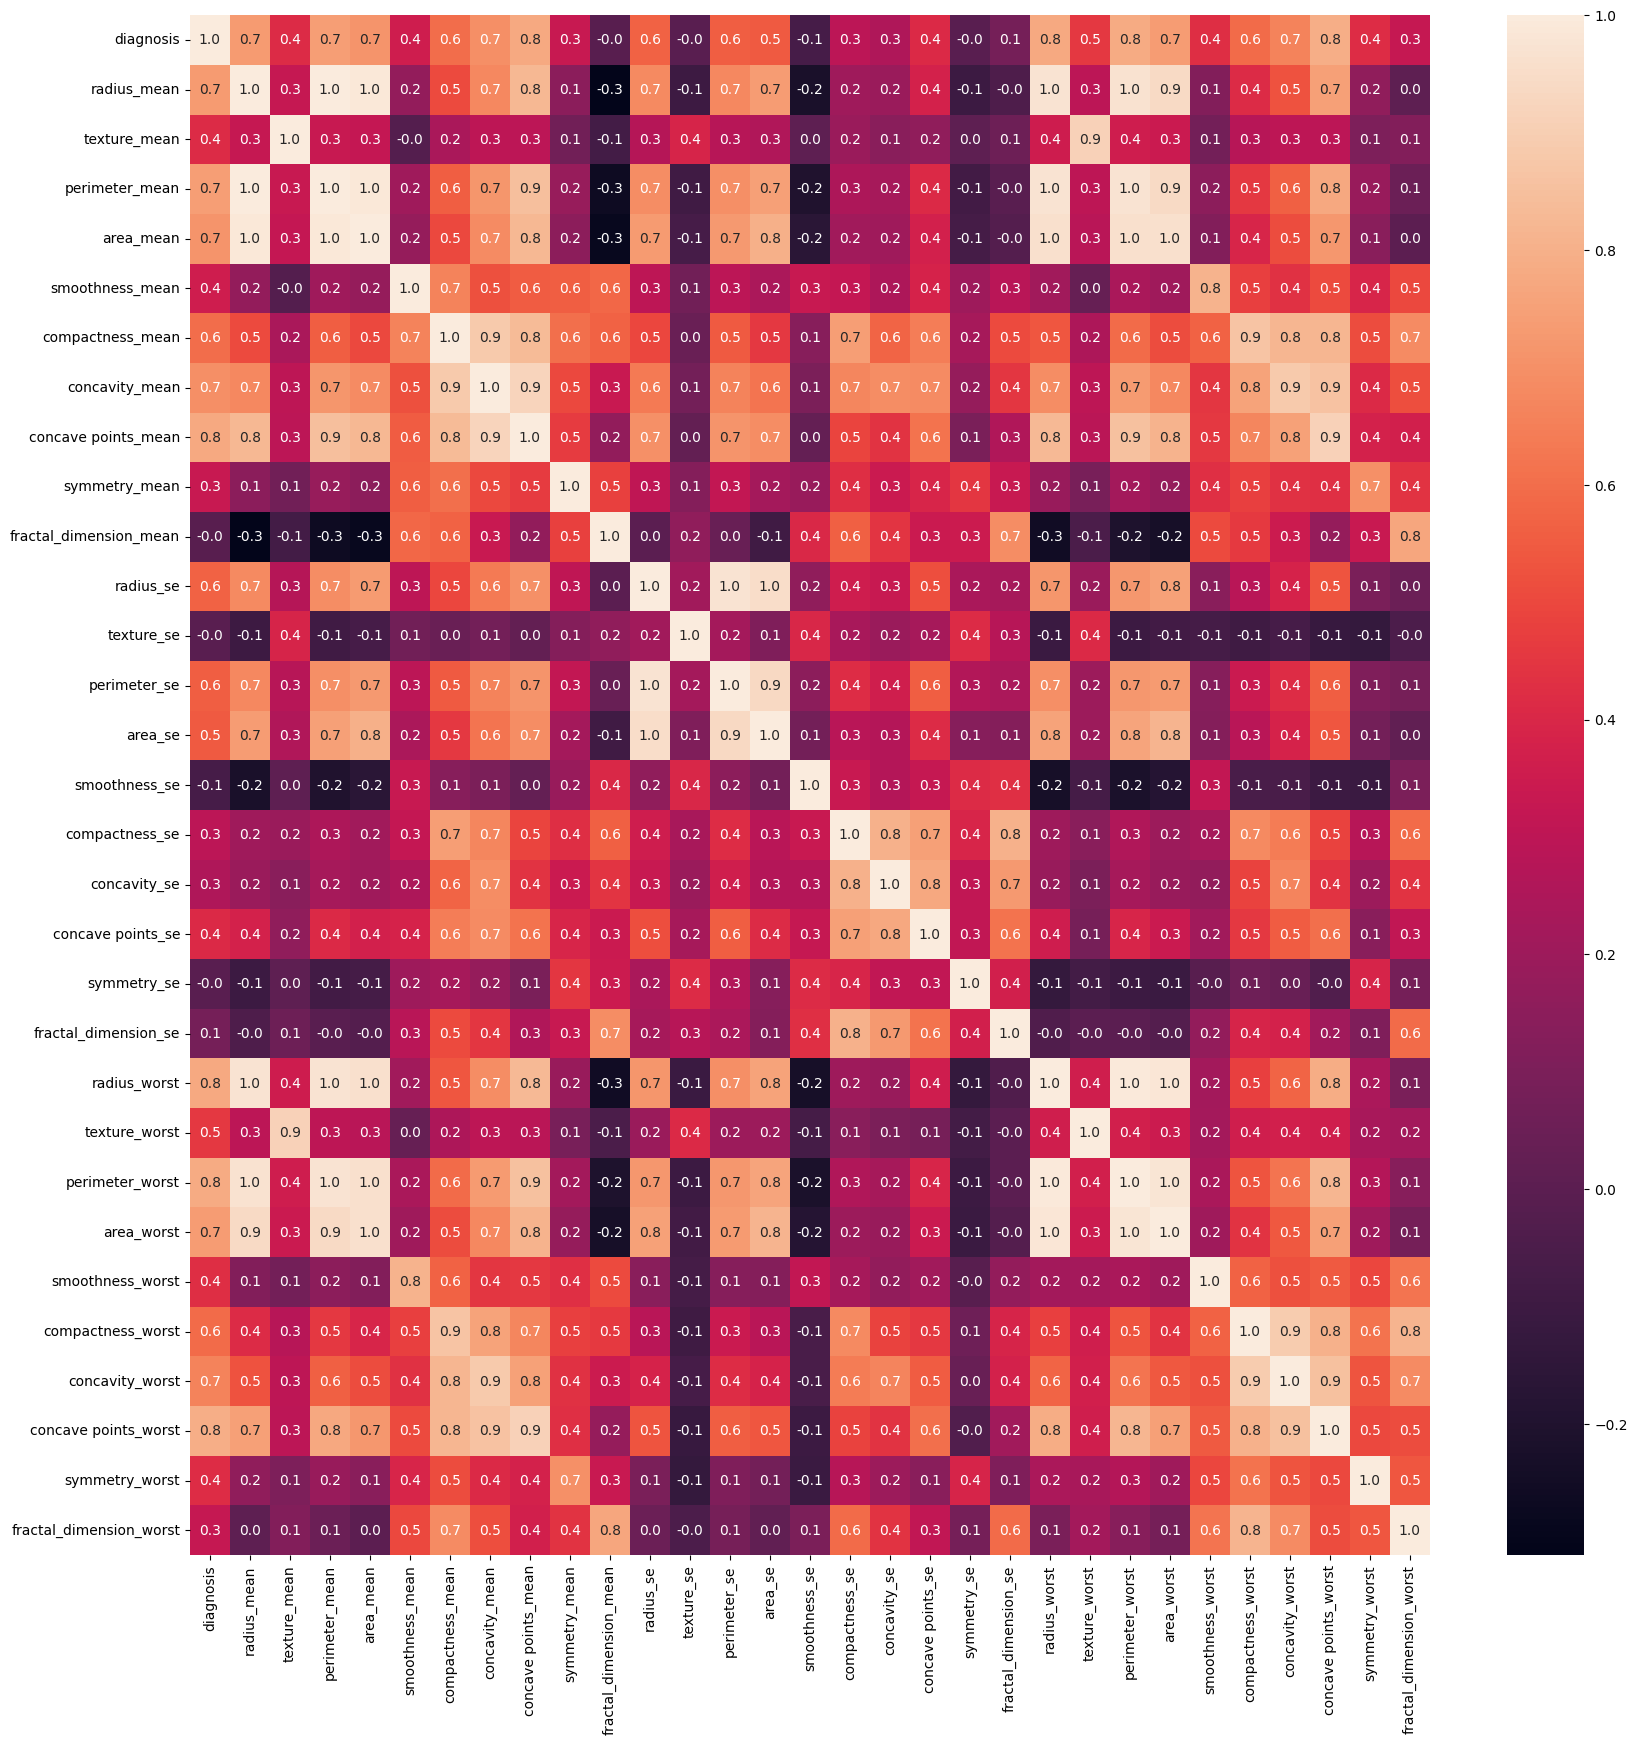

In [17]:
data = pd.concat([y, X], axis=1)
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.1f')

Ranking the features with the correlation to the target 'diagnosis'

In [18]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

corr.drop(to_drop, inplace=True)
corr['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
radius_mean                0.730029
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64

#### Feature Selection with recursive feature elimination with cross validation

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

rfecv = RFECV(estimator=LogisticRegression(random_state=0), cv=5, scoring='accuracy', step=1)
rfecv = rfecv.fit(X_train, y_train)

print(rfecv.n_features_)
print(X_train.columns[rfecv.support_])

16
Index(['texture_mean', 'concavity_mean', 'concave points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'compactness_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


#### Model Selection

In [20]:
X_train = X_train[X_train.columns[rfecv.support_]]
X_test = X_test[X_test.columns[rfecv.support_]]

models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=5), GradientBoostingClassifier(random_state=0), SVC(random_state=0)]

names = ['Logistic Regression', 'RandomForest', 'GradientBoosting', 'SVC']
summary = {}
summary['Model_Name'] = names
summary['Accuracy'] = []
summary['Recall'] = []
summary['F1-Score'] = []
summary['Precision'] = []
summary['AUC'] = []

cms = []

for idx in range(len(models)):
    m = models[idx]
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    #y_pred = cross_val_predict(models[idx], X, y)
    summary['Accuracy'].append(accuracy_score(y_test, y_pred))
    summary['Recall'].append(recall_score(y_test, y_pred))
    summary['F1-Score'].append(f1_score(y_test, y_pred))
    summary['Precision'].append(precision_score(y_test, y_pred))
    summary['AUC'].append(roc_auc_score(y_test, y_pred))

    cms.append(confusion_matrix(y_test, y_pred))

Accuracy and Recall are the two important metrics

In [21]:
pd.DataFrame(summary).sort_values(['Accuracy','Recall'], ascending=False)

,Model_Name,Accuracy,Recall,F1-Score,Precision,AUC
0,Logistic Regression,0.979021,0.962264,0.971429,0.980769,0.975577
2,GradientBoosting,0.972028,0.981132,0.962963,0.945455,0.973899
1,RandomForest,0.965035,0.981132,0.954128,0.928571,0.968344
3,SVC,0.958042,0.943396,0.943396,0.943396,0.955031


Logistic Regression and Gradient Boosting have the best Accuracy Score. Gradient Boosting has a higher Recall Score which might be better in this case as this results in less undetected malicous diagnosis.

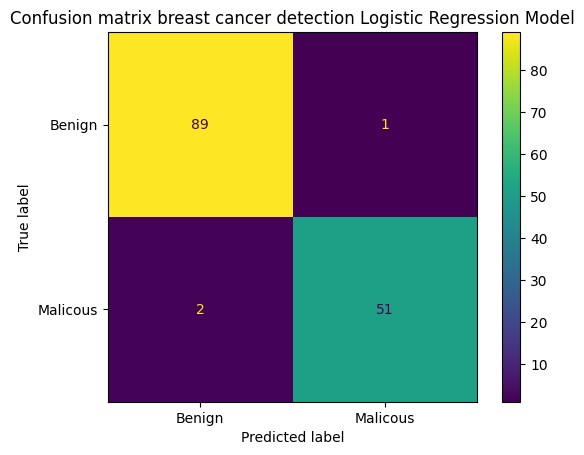

In [22]:
ax = plt.axes()
disp = ConfusionMatrixDisplay(confusion_matrix=cms[0], display_labels=['Benign','Malicous'])
ax.set_title('Confusion matrix breast cancer detection Logistic Regression Model')
disp.plot(ax=ax)

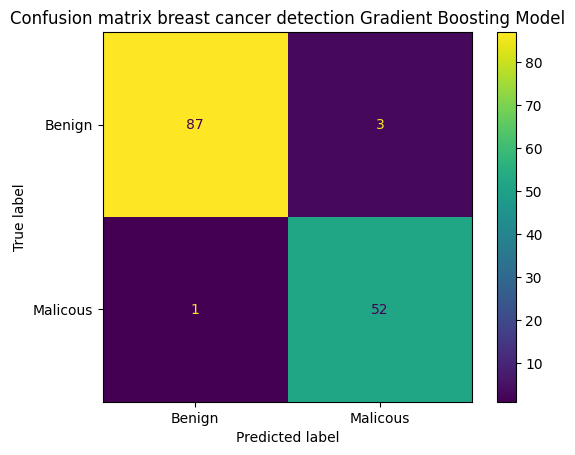

In [23]:
ax = plt.axes()
disp = ConfusionMatrixDisplay(confusion_matrix=cms[2], display_labels=['Benign','Malicous'])
ax.set_title('Confusion matrix breast cancer detection Gradient Boosting Model')
disp.plot(ax=ax)